<a href="https://colab.research.google.com/github/JakobFrh/DS-ML_Final/blob/main/Comparison_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nltk

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from nltk.corpus import stopwords

In [4]:
# Load French stop words from nltk
french_stop_words = stopwords.words('french')

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Assume you have a dataframe 'df' with 'sentence' and 'difficulty' columns
train=pd.read_csv('https://raw.githubusercontent.com/BalthazazarDuc/Data-Science-Machine-Learning/main/training_data.csv?token=GHSAT0AAAAAACOZ4C73W6RMSSTLRC7G5PO6ZQ77H5Q')
test=pd.read_csv('https://raw.githubusercontent.com/BalthazazarDuc/Data-Science-Machine-Learning/main/unlabelled_test_data.csv?token=GHSAT0AAAAAACOZ4C73AOLJGUSBJSLVF63OZQ72D6A')



# Preprocessing



vectorizer = TfidfVectorizer(
    #max_df=0.95,         # Ignore terms that appear in more than 95% of the documents
    min_df=2,            # Ignore terms that appear in fewer than 2 documents
    ngram_range=(1, 2),  # Use unigrams and bigrams
    #stop_words= french_stop_words, # Remove french stop words
    max_features=5000,   # Limit the number of features to the 5000 most frequent terms
    use_idf=True,        # Enable inverse-document-frequency reweighting
    smooth_idf=True,     # Smooth idf weights by adding one to document frequencies
    sublinear_tf=True    # Apply sublinear term frequency scaling
)
X = vectorizer.fit_transform(train['sentence'])
y = train['difficulty']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression

In [64]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_iter': [100, 200, 300, 400, 500, 1000]}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)

Best Parameters: {'max_iter': 100}
Best F1 Score: 0.4421875


Logistic Regression Results
              precision    recall  f1-score     support
A1             0.504902  0.620482  0.556757  166.000000
A2             0.358108  0.335443  0.346405  158.000000
B1             0.403226  0.301205  0.344828  166.000000
B2             0.445312  0.372549  0.405694  153.000000
C1             0.388235  0.434211  0.409938  152.000000
C2             0.483871  0.545455  0.512821  165.000000
accuracy       0.436458  0.436458  0.436458    0.436458
macro avg      0.430609  0.434891  0.429407  960.000000
weighted avg   0.431577  0.436458  0.430617  960.000000


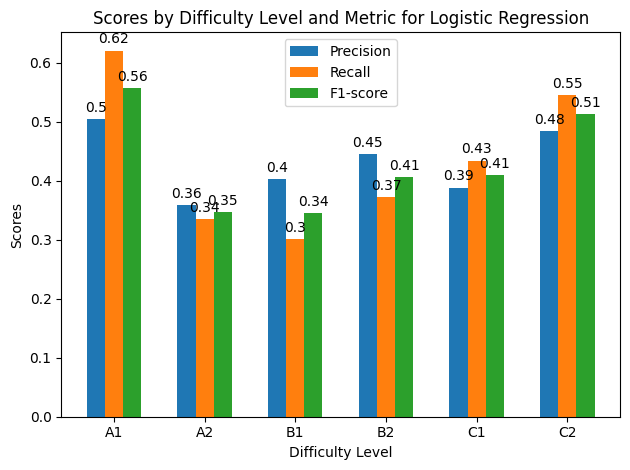

In [65]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print results in a table
print("Logistic Regression Results")
print(report_df)

# Extract precision, recall, and f1-score for each difficulty level
difficulty_levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
data = {metric: [report_df.loc[level][metric] for level in difficulty_levels] for metric in metrics}

# Plotting
x = np.arange(len(difficulty_levels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, data['precision'], width, label='Precision')
bars2 = ax.bar(x, data['recall'], width, label='Recall')
bars3 = ax.bar(x + width, data['f1-score'], width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Scores')
ax.set_title('Scores by Difficulty Level and Metric for Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(difficulty_levels)
ax.legend()

# Add labels to bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

fig.tight_layout()

plt.show()

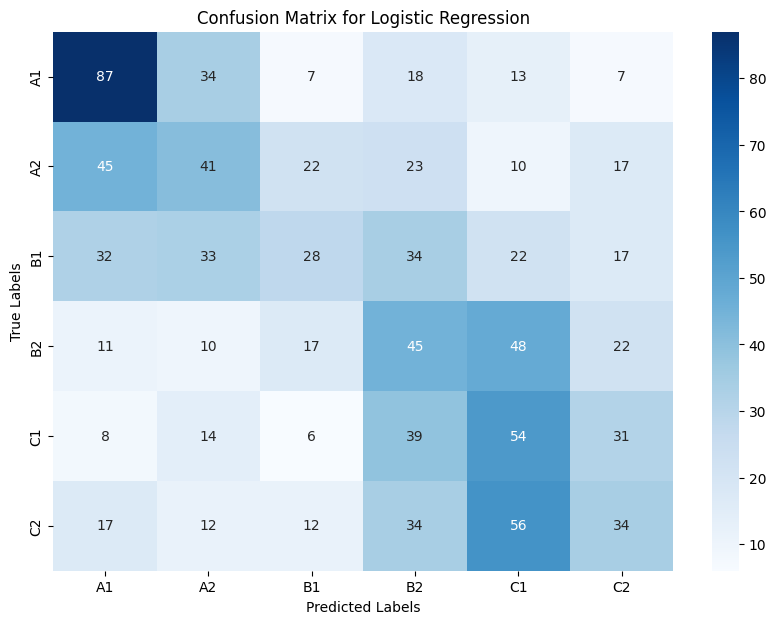

In [75]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=difficulty_levels)

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=difficulty_levels, yticklabels=difficulty_levels)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Logistic Regression')

plt.savefig("confusion_matrix_LR_2.png")
plt.show()

# K nearest Neighbors

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for n_neighbors
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform Grid Search with Cross-Validation
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best Parameters for KNN:", best_params_knn)
print("Best F1 Score for KNN:", best_score_knn)


Best Parameters for KNN: {'n_neighbors': 13}
Best F1 Score for KNN: 0.35078124999999993


K-Nearest Neighbors Results
              precision    recall  f1-score     support
A1             0.403846  0.632530  0.492958  166.000000
A2             0.315217  0.183544  0.232000  158.000000
B1             0.329268  0.162651  0.217742  166.000000
B2             0.500000  0.150327  0.231156  153.000000
C1             0.254587  0.730263  0.377551  152.000000
C2             0.613636  0.163636  0.258373  165.000000
accuracy       0.335417  0.335417  0.335417    0.335417
macro avg      0.402759  0.337159  0.301630  960.000000
weighted avg   0.404113  0.335417  0.302102  960.000000


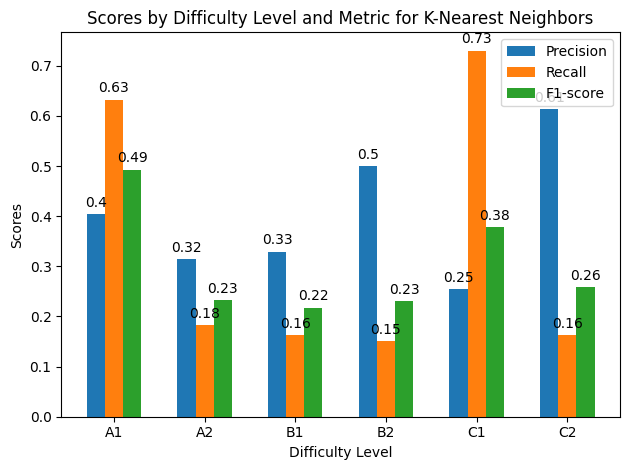

In [77]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print results in a table
print("K-Nearest Neighbors Results")
print(report_df)

# Extract precision, recall, and f1-score for each difficulty level
difficulty_levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
data = {metric: [report_df.loc[level][metric] for level in difficulty_levels] for metric in metrics}

# Plotting
x = np.arange(len(difficulty_levels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, data['precision'], width, label='Precision')
bars2 = ax.bar(x, data['recall'], width, label='Recall')
bars3 = ax.bar(x + width, data['f1-score'], width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Scores')
ax.set_title('Scores by Difficulty Level and Metric for K-Nearest Neighbors')
ax.set_xticks(x)
ax.set_xticklabels(difficulty_levels)
ax.legend()

# Add labels to bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

fig.tight_layout()

plt.show()


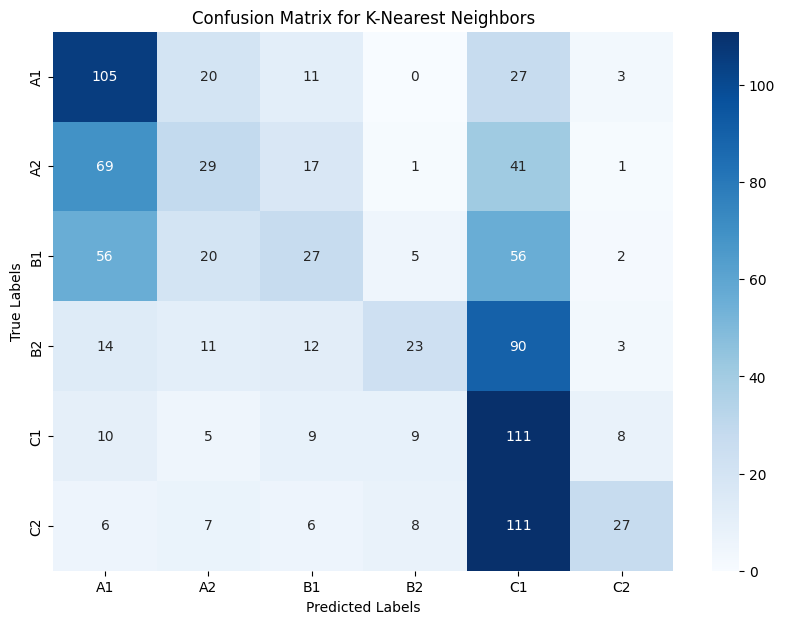

In [78]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=difficulty_levels)

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=difficulty_levels, yticklabels=difficulty_levels)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for K-Nearest Neighbors')

plt.savefig("confusion_matrix_KNN_2.png")
plt.show()

# Decision Tree Classifier

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for n_neighbors
param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}

# Initialize the DTC model
dt = DecisionTreeClassifier()


# Perform Grid Search with Cross-Validation using 'accuracy' as the scoring parameter
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters for DT:", best_params_dt)
print("Best F1 Score for DT:", best_score_dt)


Best Parameters for DT: {'max_depth': 20}
Best F1 Score for DT: 0.30078125


Decision Tree Results
              precision    recall  f1-score     support
A1             0.435000  0.524096  0.475410  166.000000
A2             0.284722  0.259494  0.271523  158.000000
B1             0.304348  0.168675  0.217054  166.000000
B2             0.233161  0.294118  0.260116  153.000000
C1             0.266010  0.355263  0.304225  152.000000
C2             0.265625  0.206061  0.232082  165.000000
accuracy       0.301042  0.301042  0.301042    0.301042
macro avg      0.298144  0.301284  0.293402  960.000000
weighted avg   0.299639  0.301042  0.293941  960.000000


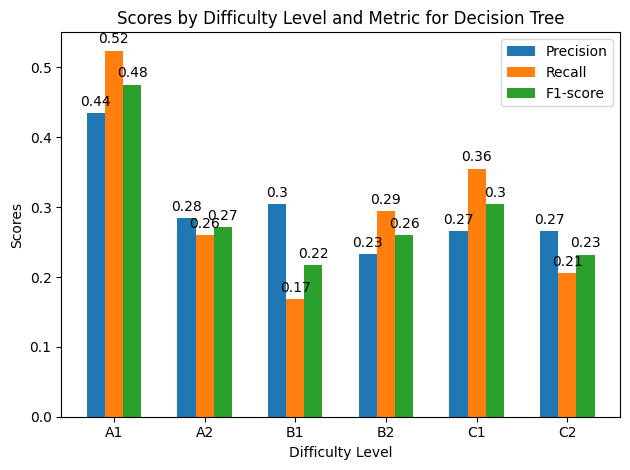

In [71]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=20) # None
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print results in a table
print("Decision Tree Results")
print(report_df)

# Extract precision, recall, and f1-score for each difficulty level
difficulty_levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
data = {metric: [report_df.loc[level][metric] for level in difficulty_levels] for metric in metrics}

# Plotting
x = np.arange(len(difficulty_levels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, data['precision'], width, label='Precision')
bars2 = ax.bar(x, data['recall'], width, label='Recall')
bars3 = ax.bar(x + width, data['f1-score'], width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Scores')
ax.set_title('Scores by Difficulty Level and Metric for Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(difficulty_levels)
ax.legend()

# Add labels to bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

fig.tight_layout()

plt.show()


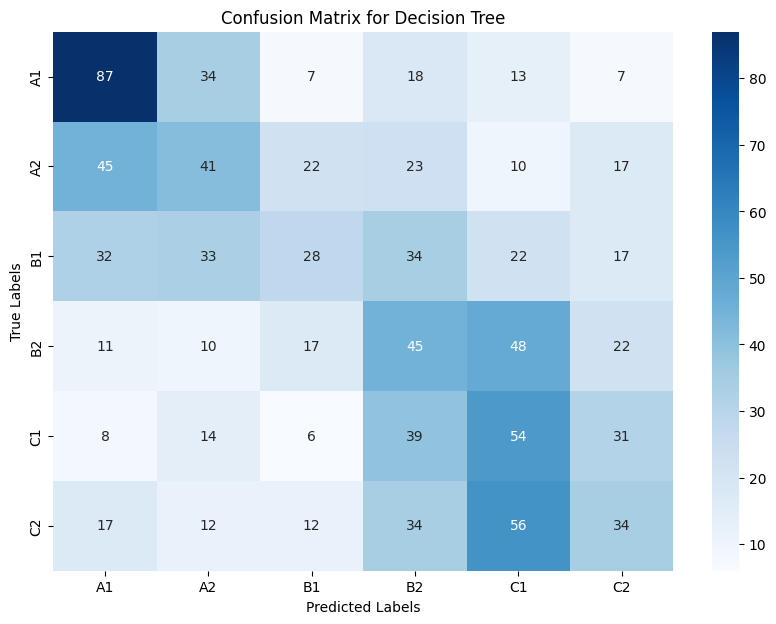

In [72]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=difficulty_levels)

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=difficulty_levels, yticklabels=difficulty_levels)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Decision Tree')

plt.savefig("confusion_matrix_DT.png")
plt.show()

# Random Forest Classifier

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for n_neighbors
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500]}

# Initialize the DTC model
rf = RandomForestClassifier(random_state=42)


# Perform Grid Search with Cross-Validation using 'accuracy' as the scoring parameter
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for DT:", best_params_rf)
print("Best F1 Score for DT:", best_score_rf)

Best Parameters for DT: {'n_estimators': 400}
Best F1 Score for DT: 0.3966145833333333


Random Forest Results
              precision    recall  f1-score     support
A1             0.438202  0.704819  0.540416  166.000000
A2             0.344371  0.329114  0.336570  158.000000
B1             0.278261  0.192771  0.227758  166.000000
B2             0.318584  0.235294  0.270677  153.000000
C1             0.340909  0.296053  0.316901  152.000000
C2             0.384615  0.424242  0.403458  165.000000
accuracy       0.366667  0.366667  0.366667    0.366667
macro avg      0.350824  0.363716  0.349297  960.000000
weighted avg   0.351423  0.366667  0.350883  960.000000


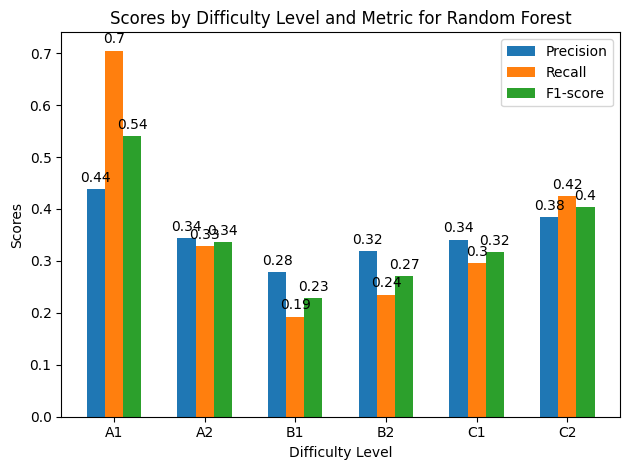

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest = RandomForestClassifier(n_estimators=300, random_state = 42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print results in a table
print("Random Forest Results")
print(report_df)

# Extract precision, recall, and f1-score for each difficulty level
difficulty_levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
data = {metric: [report_df.loc[level][metric] for level in difficulty_levels] for metric in metrics}

# Plotting
x = np.arange(len(difficulty_levels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, data['precision'], width, label='Precision')
bars2 = ax.bar(x, data['recall'], width, label='Recall')
bars3 = ax.bar(x + width, data['f1-score'], width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Scores')
ax.set_title('Scores by Difficulty Level and Metric for Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(difficulty_levels)
ax.legend()

# Add labels to bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

fig.tight_layout()

plt.show()


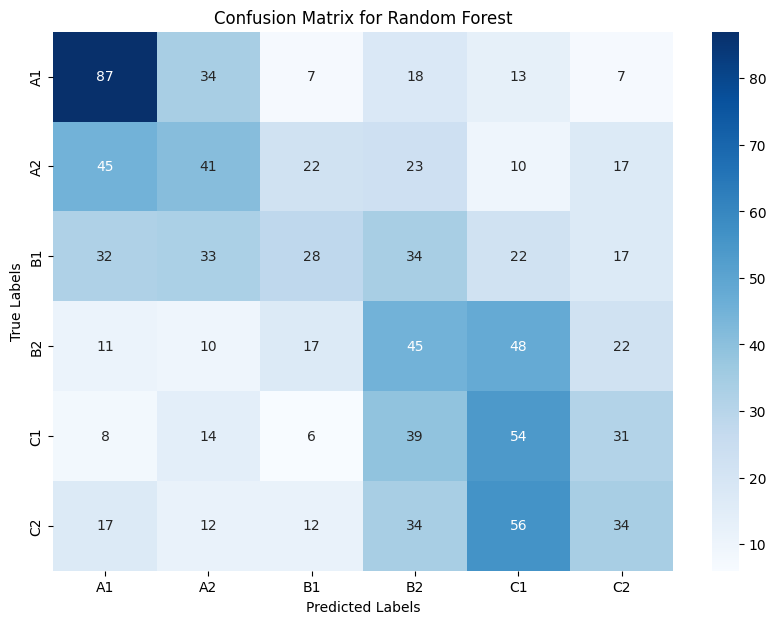

In [74]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=difficulty_levels)

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=difficulty_levels, yticklabels=difficulty_levels)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Random Forest')

plt.savefig("confusion_matrix_RF.png")
plt.show()

Support Vector Machine Results
              precision    recall  f1-score  support
A1             0.533679  0.620482  0.573816  166.000
A2             0.390244  0.405063  0.397516  158.000
B1             0.342282  0.307229  0.323810  166.000
B2             0.391608  0.366013  0.378378  153.000
C1             0.393750  0.414474  0.403846  152.000
C2             0.470199  0.430303  0.449367  165.000
accuracy       0.425000  0.425000  0.425000    0.425
macro avg      0.420294  0.423927  0.421122  960.000
weighted avg   0.421268  0.425000  0.422120  960.000


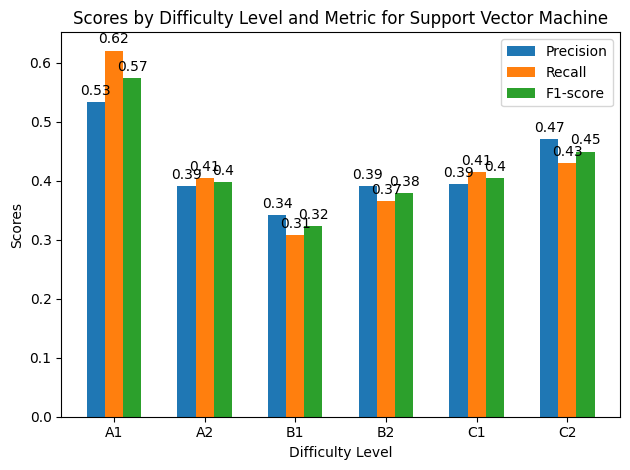

In [58]:
# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print results in a table
print("Support Vector Machine Results")
print(report_df)

# Extract precision, recall, and f1-score for each difficulty level
difficulty_levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
data = {metric: [report_df.loc[level][metric] for level in difficulty_levels] for metric in metrics}

# Plotting
x = np.arange(len(difficulty_levels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, data['precision'], width, label='Precision')
bars2 = ax.bar(x, data['recall'], width, label='Recall')
bars3 = ax.bar(x + width, data['f1-score'], width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Scores')
ax.set_title('Scores by Difficulty Level and Metric for Support Vector Machine')
ax.set_xticks(x)
ax.set_xticklabels(difficulty_levels)
ax.legend()

# Add labels to bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

fig.tight_layout()

plt.show()